<a href="https://colab.research.google.com/github/armirchandani/StockPricePredictionKNN/blob/main/StockPricePredictionKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_curve,auc)
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [98]:
# Define the ticker
ticker = yf.Ticker("ORCL")

In [99]:
# Get historical stock data (you can change the date range as needed)
data = ticker.history(start="1986-05-31", end="2025-01-01")

In [100]:
# Show the first 5 rows
print(data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
1986-06-02 00:00:00-04:00  0.058369  0.058369  0.055265  0.056506   8845200   
1986-06-03 00:00:00-04:00  0.056506  0.058059  0.052160  0.058059  62175600   
1986-06-04 00:00:00-04:00  0.058059  0.058369  0.057128  0.058369  22582800   
1986-06-05 00:00:00-04:00  0.058369  0.064579  0.057128  0.062095  28447200   
1986-06-06 00:00:00-04:00  0.062095  0.063337  0.062095  0.062095   4341600   

                           Dividends  Stock Splits  
Date                                                
1986-06-02 00:00:00-04:00        0.0           0.0  
1986-06-03 00:00:00-04:00        0.0           0.0  
1986-06-04 00:00:00-04:00        0.0           0.0  
1986-06-05 00:00:00-04:00        0.0           0.0  
1986-06-06 00:00:00-04:00        0.0           0.0  


In [101]:
# Show the last 5 rows
print(data.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2024-12-24 00:00:00-05:00  168.677977  170.735518  168.012014  170.377686   
2024-12-26 00:00:00-05:00  169.473171  171.510828  169.473171  170.646057   
2024-12-27 00:00:00-05:00  169.353890  170.119242  166.193034  167.942444   
2024-12-30 00:00:00-05:00  165.507200  166.898778  163.559013  165.904800   
2024-12-31 00:00:00-05:00  166.193039  166.292442  164.841229  165.636414   

                            Volume  Dividends  Stock Splits  
Date                                                         
2024-12-24 00:00:00-05:00  2451500        0.0           0.0  
2024-12-26 00:00:00-05:00  4100100        0.0           0.0  
2024-12-27 00:00:00-05:00  4344300        0.0           0.0  
2024-12-30 00:00:00-05:00  5254800        0.0           0.0  
2024-12-31 00:00:00-05:00  4307500        0.0           0.0  


In [102]:
# Feature Engineering: Create features and labels
data['Return'] = data['Close'].pct_change()
data['Direction'] = np.where(data['Return'] > 0, 1, 0)  # 1 if price goes up, 0 if down
data.dropna(inplace=True)

In [103]:
# Define features and labels
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Direction']

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [107]:
# Make predictions
y_pred = knn.predict(X_test)

In [108]:
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


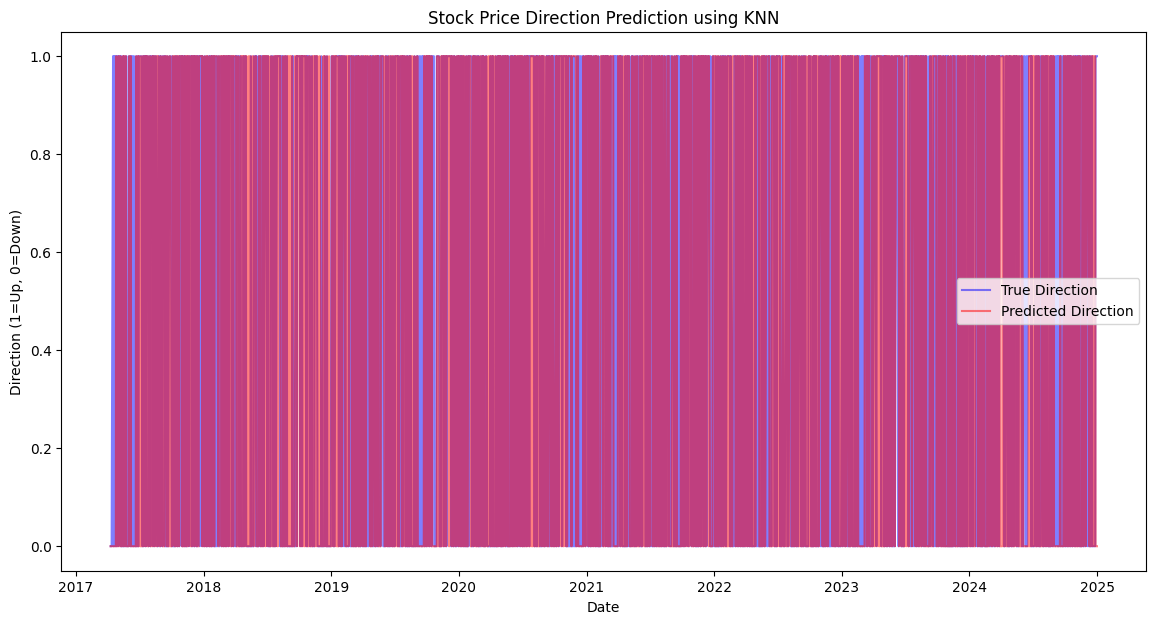

In [109]:
# Visualize the predictions
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test.values, label='True Direction', color='blue', alpha=0.5)
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Direction', color='red', alpha=0.5)
plt.title('Stock Price Direction Prediction using KNN')
plt.xlabel('Date')
plt.ylabel('Direction (1=Up, 0=Down)')
plt.legend()
plt.show()